In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [340]:
df=pd.read_csv('data/kc_cleaned_data.csv')

In [341]:
df['bed_bath']=df['bedrooms']+df['bathrooms']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated,bed_bath
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,0.0,4.00
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,1,0,29.0,5.25
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,0.0,3.00
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,1,0,0.0,7.00
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0,5.00


In [342]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement',
       'is_cust_build', 'years_since_renovated', 'bed_bath'],
      dtype='object')

# Tinker

In [343]:
df.drop(columns=['id', 'date'], inplace=True)

In [344]:
df = df.loc[df['bedrooms']< 6]
df = df.loc[df['bedrooms']>0]
df = df.loc[df['price']< 3_000_000]
df = df.loc[df['bathrooms']< 4]
df = df.loc[df['bathrooms'] > 1]

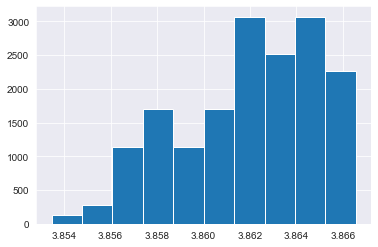

In [345]:
log_lat= np.log(df['lat'])
plt.hist(log_lat)
plt.show()

In [346]:
df['lat']= log_lat

In [347]:
df['long'] = df['long'].abs()

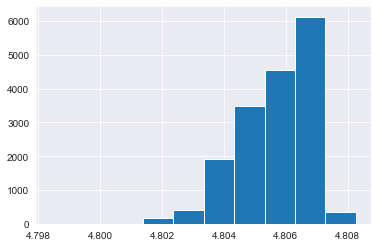

In [348]:
log_long= np.log(df['long'])
plt.hist(log_long)
plt.show()

In [349]:
df['long']=log_long

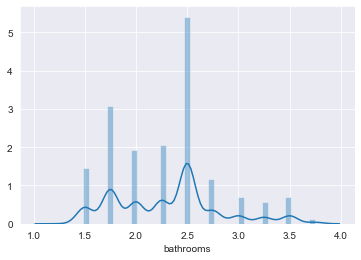

In [350]:
sns.distplot(df.bathrooms)
plt.show()

- columns
price
bedrooms
bathrooms

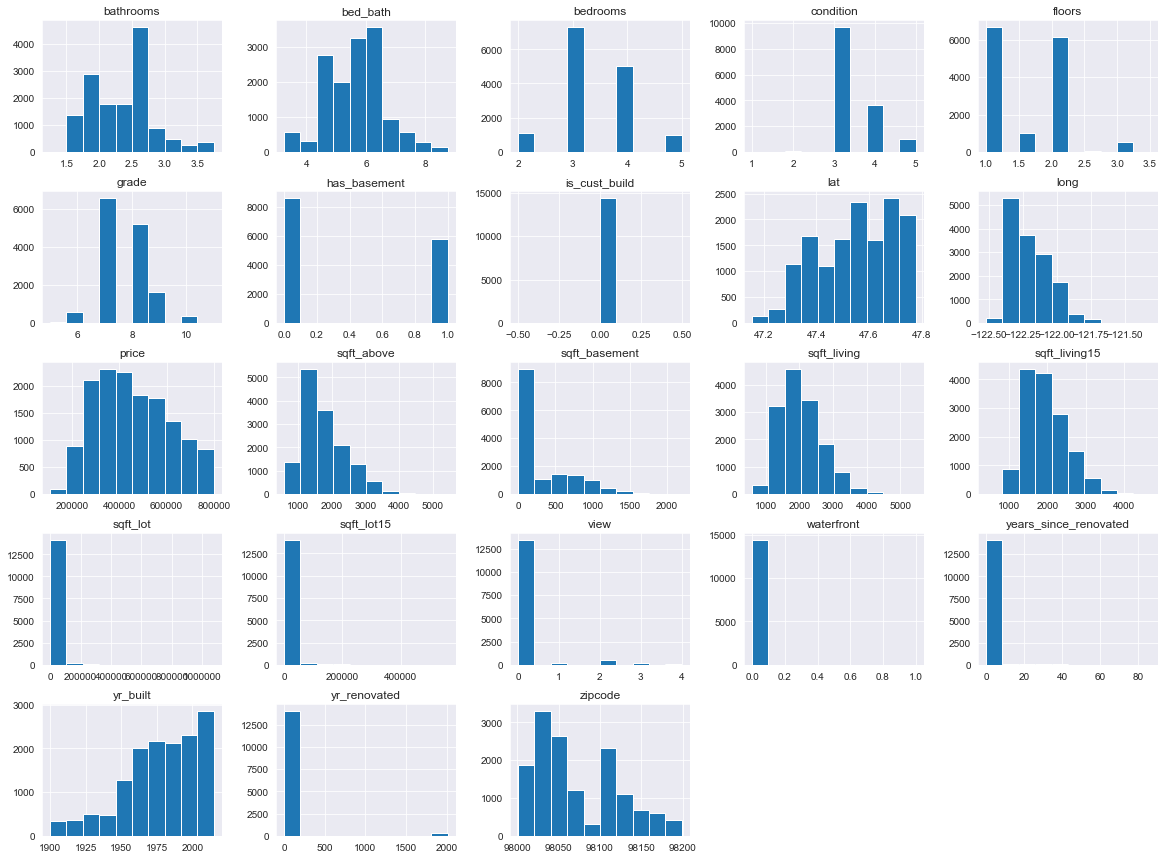

In [200]:
df.hist(figsize=(20,15))
plt.show()

# Model

In [81]:
feats = ['price', 'floors', 'lat', 'long', 'bedrooms', 'sqft_living', 'sqft_lot', 'view']

In [82]:
corr = df[feats].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, center=0, annot=True, cmap='coolwarm');

In [78]:
df2 = df.copy()
df2.drop(columns=['id', 'date', 'bed_bath', 
       'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'has_basement',
       'is_cust_build', 'years_since_renovated'], inplace=True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,47.6168,-122.045


In [ ]:
[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 
 
 
 'has_basement'
 'yr_renovated'
 'sqft_lot15', 
 

In [417]:
outcome = 'price'
x_cols = ['view', 'waterfront', 'is_cust_build', 'grade', 'yr_renovated', 'has_basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2997.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:07:19   Log-Likelihood:            -2.3307e+05
No. Observations:               17005   AIC:                         4.662e+05
Df Residuals:                   16998   BIC:                         4.662e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.029e+05   1.33e+04    -67.780      0.000   -9.29e+05   -8.77e+05
view           7.041e+04   2404.491     29.282      0.000    6.57e+04    7.51e+04
waterfront     3.828e+05   2.35e+04     16.292      0.000    3.37e+05    4.29e+05
is_cust_build  3.339e+05   3.31e+04     10.075      0.000    2.69e+05    3.99e+05
grade          1.779e+05   1667.197    106.684      0.000    1.75e+05    1.81e+05
yr_renovated     84.6172      4.604     18.378      0.000      75.592      93.642
has_basement   8.735e+04   3453.510     25.293      0.000    8.06e+04    9.41e+04
==============================================================================
Omnibus:                     6509.885   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45667.032
Skew:                           1.674   Prob(JB):                         0.00
Kurtosis:                      10.297   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [418]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('view', 1.310700355358744),
 ('waterfront', 1.1489152195084922),
 ('is_cust_build', 1.0136763394047714),
 ('grade', 1.7371167494118496),
 ('yr_renovated', 1.0483075635008294),
 ('has_basement', 1.7128221385127094)]

# Random Shit

In [ ]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

df2_corr=df2.corr()

abs(df2_corr) > 0.5

# Log Trans

log_sqft_living = np.log(df['sqft_living'])
plt.hist(log_sqft_living)
plt.show()

log_sqft_lot = np.log(df['sqft_lot'])
plt.hist(log_sqft_lot)
plt.show()

df['sqft_living'] = log_sqft_living
df['sqft_lot'] = log_sqft_lot
df.head()